In [4]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from matplotlib import style as sty
from pandas.plotting import lag_plot as lp
from pandas.plotting import autocorrelation_plot as ap
from pandas.plotting import bootstrap_plot as bp
from pandas.plotting import scatter_matrix as sm
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
sty.use('seaborn-dark')

In [8]:
dF = pd.read_csv("Samanet_Ve8_[2008-2019]_monthly_averages_nonan.csv",index_col=0)
dF.head

<bound method NDFrame.head of             Temperatura        Sal          OD  Clorofilla
Data                                                      
2008-01-31     6.325044  30.952730  113.977473    0.489644
2008-02-29     6.887059  30.906057  114.264145    0.469652
2008-03-31     9.600571  33.160149  108.787823    0.671129
2008-04-30    14.598941  33.312090   83.119121    0.802720
2008-05-31    20.186227  30.404703   74.307903    1.222575
...                 ...        ...         ...         ...
2019-08-31    27.262599  31.751732   66.230289    2.234739
2019-09-30    22.478238  33.790009   73.820601    1.601351
2019-10-31    19.269088  33.921028   75.650511    1.389998
2019-11-30    12.706450  29.673637   83.243911    2.429228
2019-12-31     8.807240  28.259303   86.467194    2.261914

[124 rows x 4 columns]>

In [9]:
dF.describe()

Temperatura         Sal          OD  Clorofilla
count   124.000000  124.000000  124.000000  124.000000
mean     16.486356   31.226320   88.190556    1.881881
std       7.413539    2.139828   11.833610    1.246530
min       3.015647   23.398594   42.340967    0.432472
25%       9.558435   29.890591   84.060653    1.041471
50%      16.639795   31.243709   89.458309    1.547163
75%      23.032377   32.650903   95.125270    2.293743
max      28.067810   36.603989  114.264145    7.487940

# Histogram Graphs for Each Column

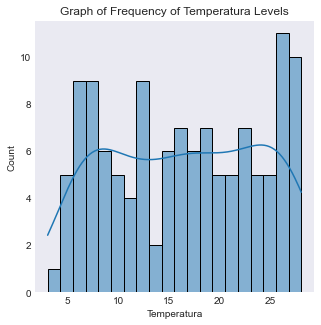

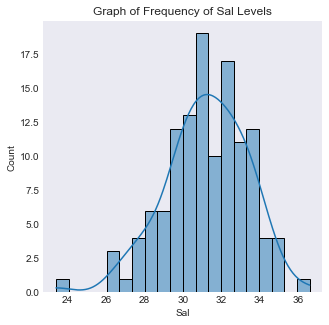

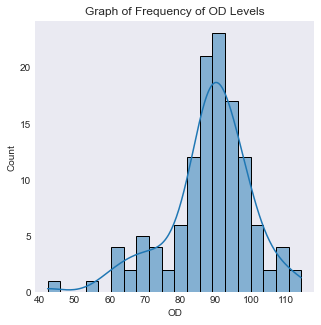

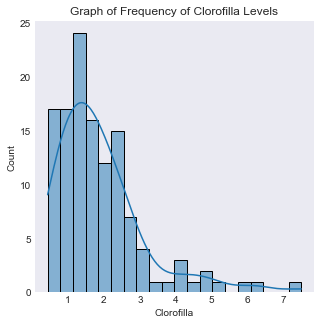

In [13]:
import seaborn as sbn
for (cN, cD) in dF.iteritems():
    plt.figure(figsize = (5, 5))
    sbn.histplot(dF[cN], kde = True, bins = 20).set_title('Graph of Frequency of ' + cN + ' Levels')
    plt.savefig(cN + ' Hist Graph Seaborn', dpi = 500, bbox_inches = 'tight')

Text(0.5, 1.0, 'Graph of Frequency of Sal Levels')

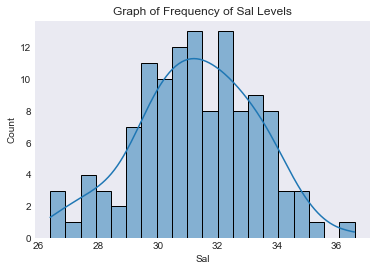

In [17]:
dF = dF.loc[dF['Sal'] >= 24]
sbn.histplot(dF.loc[dF['Sal'] >= 24]["Sal"],kde = True, bins = 20).set_title('Graph of Frequency of Sal Levels')
#only one value lower than 26. removing it to normally distribute the data

Text(0.5, 1.0, 'Graph of Frequency of Clorofila Levels')

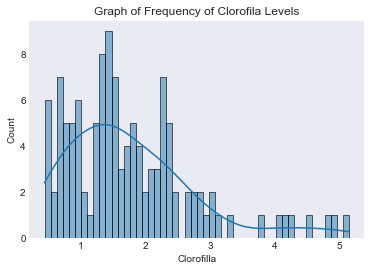

In [18]:
dF = dF.loc[dF['Clorofilla'] <= 6]
sbn.histplot(dF.loc[dF['Clorofilla'] <= 6]["Clorofilla"],kde = True, bins = 50).set_title('Graph of Frequency of Clorofila Levels')
#onyl 3 values lower than 6 so we remove it to make graph less skewed

# Pairplot (kde)
This plot type help us to see any correlation between features.

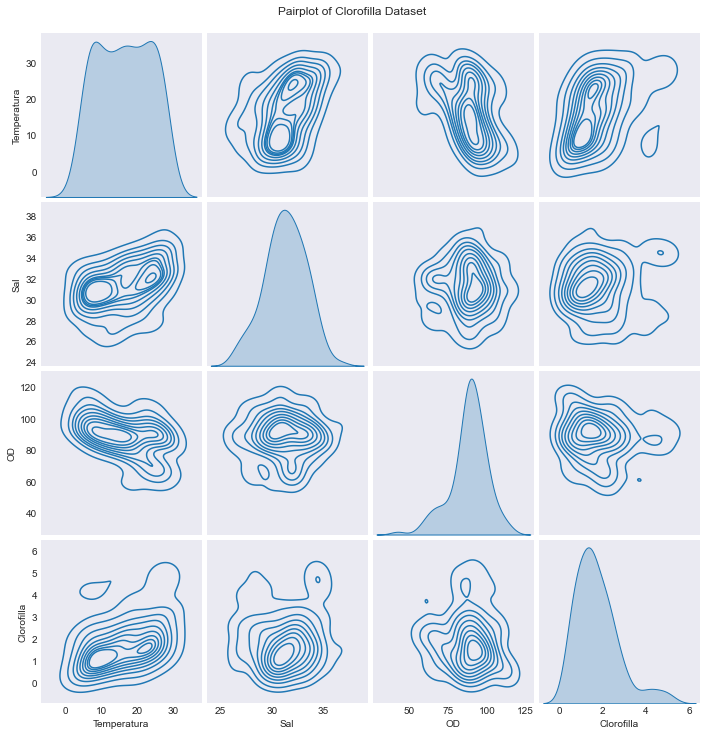

In [19]:
pairplot=sbn.pairplot(dF,kind="kde")
pairplot.fig.suptitle("Pairplot of Clorofilla Dataset",y=1.02)
plt.savefig("Pairplot Kde",dpi=1000)
plt.show()

# Lag Plot
To see any autocorrelation on features.
As seen below upcoming month's values are predictible on temperature. And kind of predictable on other features too. 

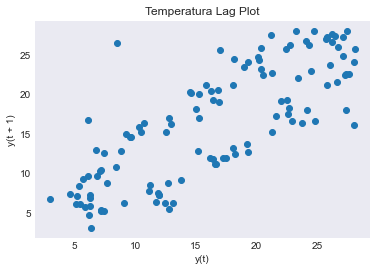

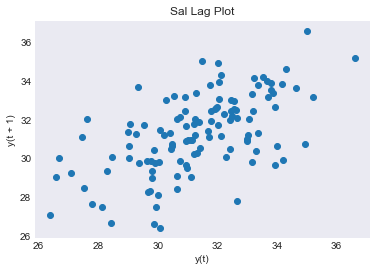

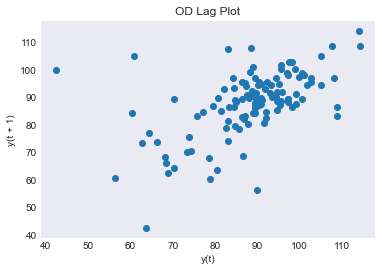

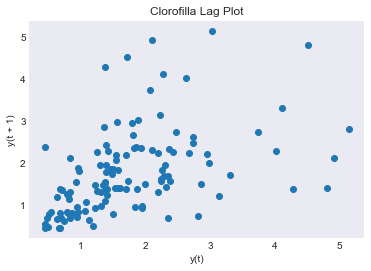

In [20]:
for (cN, cD) in dF.iteritems():
    lp(dF[cN])  #creates lag plot
    plt.title(cN + " Lag Plot") #sets title
    plt.savefig(cN + " Lag Plot", dpi = 500, bbox_inches = 'tight') #saves figure
    plt.show()

# ACF Plot
That plot helps to find out if data is stationary. And as seen below, only temperatura feature is not stationary.

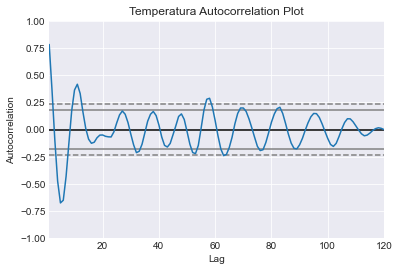

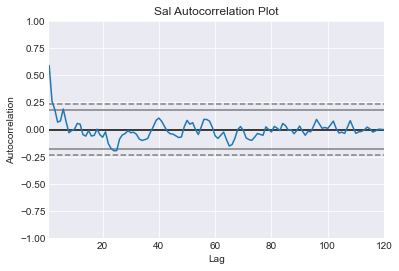

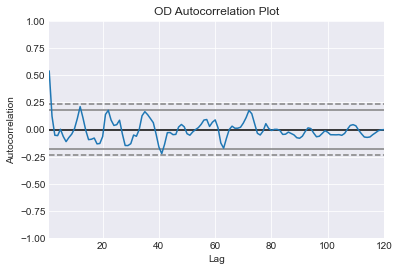

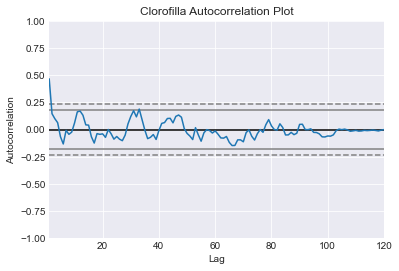

In [21]:
for (cN, cD) in dF.iteritems():
    ap(dF[cN])  #creates autocorrelation plot
    plt.title(cN + " Autocorrelation Plot")
    plt.savefig(cN + " Autocorrelation Plot", dpi = 500, bbox_inches = 'tight')
    plt.show()

# PACF and ACF Plot
I used different library to create ACF plot to see any difference on different libraries. And it seems no difference here.
PACF plot is also helps to find autocorrelation and stationarity on data.

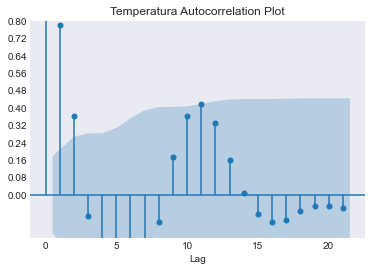

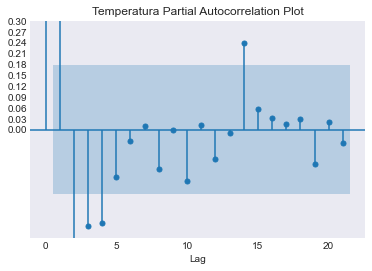

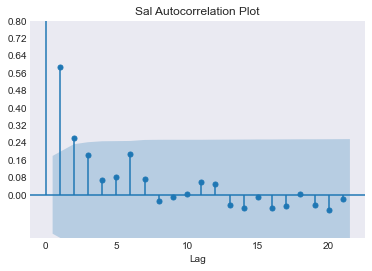

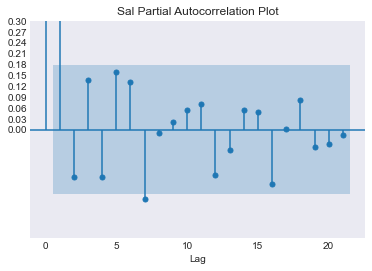

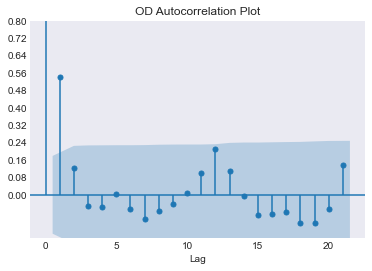

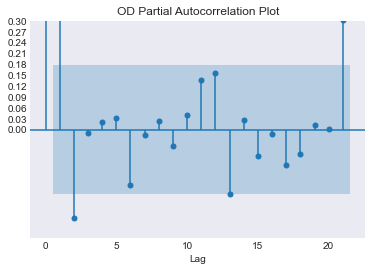

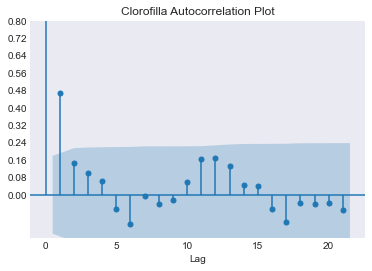

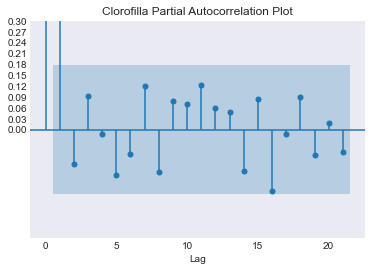

In [24]:
import warnings ## there was a warning about upcoming update
warnings.filterwarnings('ignore')
a=np.arange(0,0.11,0.01) # creates an array [0, 0.01, 0.02, ... , 0.1] to set on y ticks on pacf plot
for (cN,cD) in dF.iteritems(): #loop to create plots for each column
    #ACF Plot
    plot_acf(dF[cN],auto_ylims=True)
    plt.gca().set_ylim([-0.2,0.2])  #sets y-axis limit to see values more clearly
    plt.yticks(a*8) #sets yticks to see plot more clearly
    plt.title(cN+" Autocorrelation Plot")
    plt.xlabel("Lag")
    plt.savefig(cN+" Autocorrelation (tsaplots) Plot",dpi=500,bbox_inches='tight')
    plt.show()
    #PACF Plot
    plot_pacf(dF[cN],auto_ylims=True,alpha=0.05) #alpha is value to set confidence interval
    plt.gca().set_ylim([-0.3,0.3])
    plt.yticks(a*3)
    plt.title(cN+" Partial Autocorrelation Plot")
    plt.xlabel("Lag")
    plt.savefig(cN+" Partial Autocorrelation (tsaplots) Plot",dpi=500,bbox_inches='tight')
    plt.show()

# Line Plot with Resampled Data
All plots above has worked with monthly data. So instead of months we will get the original hourly data and resample it by month, season, year and take a look at it that way.

And also the red line on the graph is located at the mean. That way we might understand the outliers or seasonality etc easier.

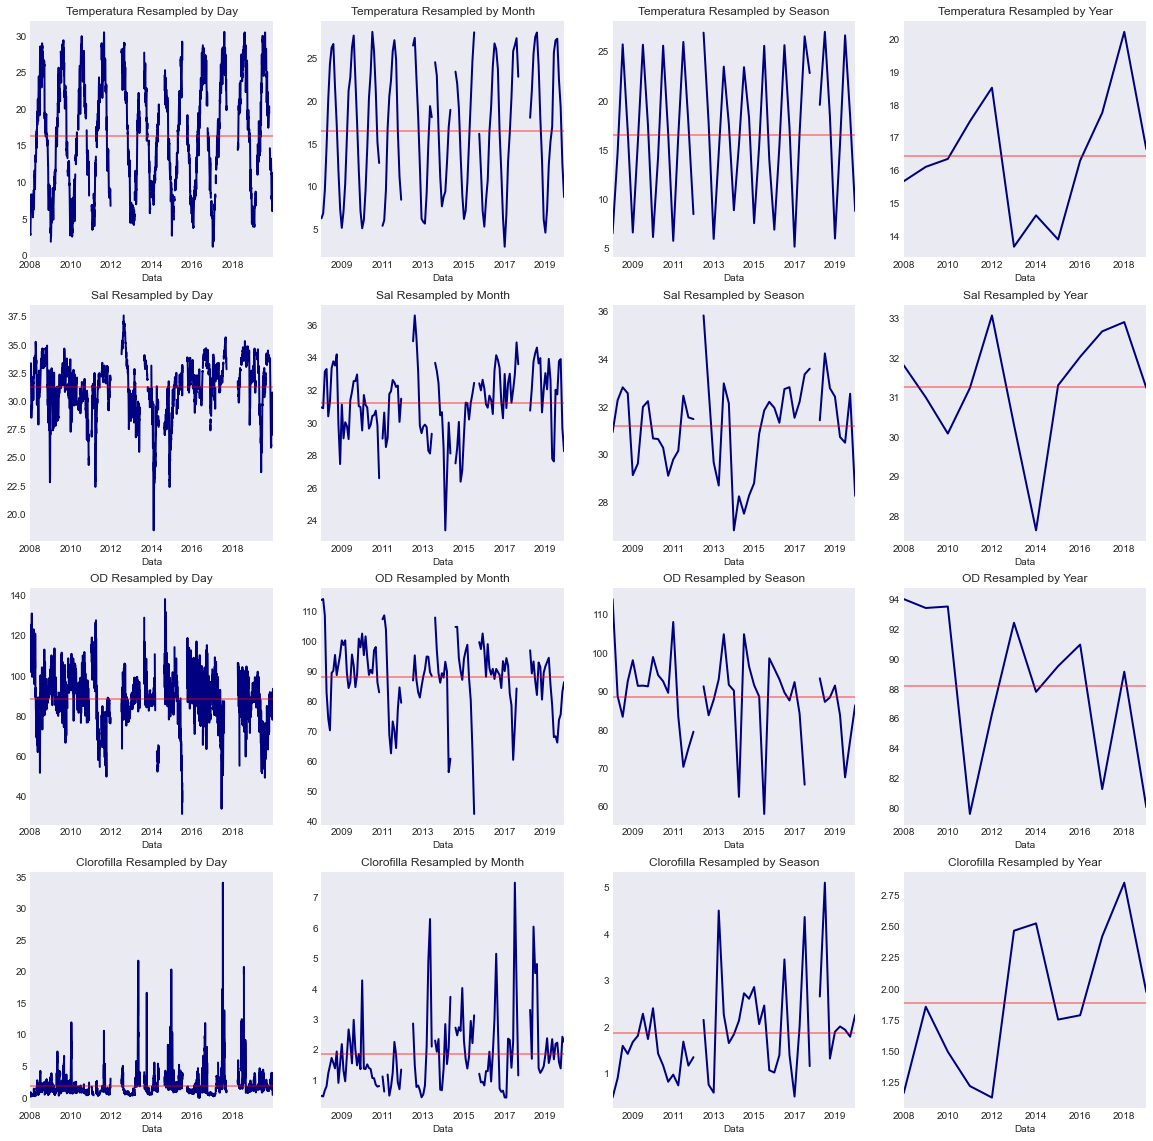

In [29]:
dF=pd.read_excel("Samanet_Ve8_[2008-2019]-hourly-with-missing-values.xlsx",index_col=0)
frequency = ["D", "M", "Q-NOV", "Y"] # hour to day, week, month and year.
timeset = ["Day", "Month", "Season","Year"]
fig, axs = plt.subplots(4, 4,figsize=(20,20))
x=0
for (cN, cD) in dF.iteritems():     #do plots for each column
    y=0
    for i in range(4):  # do it for 4 different frequency
        #dF[cN].plot(color = "navy", figsize = (40, 20), label = "Real Value")
        dFrolling = dF.resample(frequency[i]).mean() #resampled with mean with specific frequency 
        #dFstd = dF.resample(frequency[i]).std()      #resampled with std with specific frequency
        dFrolling[cN].plot(color = "navy", linewidth = 2, label = ("Resampled Data by "+ timeset[i]),ax=axs[x,y])
        axs[x,y].axhline(y=dFrolling[cN].mean(), color='r', linestyle='-',label="Mean",alpha=0.5)
        #plt.fill_between(dFstd.index, dFrolling[cN] - 2 * dFstd[cN], dFrolling[cN] + 2 * dFstd[cN], color = "g", alpha = 0.2,label="Error interval")
        # plt.legend(loc = "best",prop={'size': 10})
        # plt.xlabel("Date")
        # plt.ylabel(cN + " Levels")
        # plt.title("Line Graph of " + cN + " Resampled by "+timeset[i], fontdict = {'fontsize':12})
        axs[x,y].title.set_text(cN + " Resampled by "+timeset[i])
        #plt.savefig(cN + ' Resampled by'+timeset[i], dpi = 500, bbox_inches = 'tight') #saving figure
        y=y+1
    x=x+1

# Line Plot with IQR
IQR is Interquartile Range. And using this formula we can detect outliers. So we will calculate that and add it to graph to easily see the outliers. We also resample the data so we can see how outliers changes in different frequencies.

Note: copy plots to a new tab, that way they are way more readable.

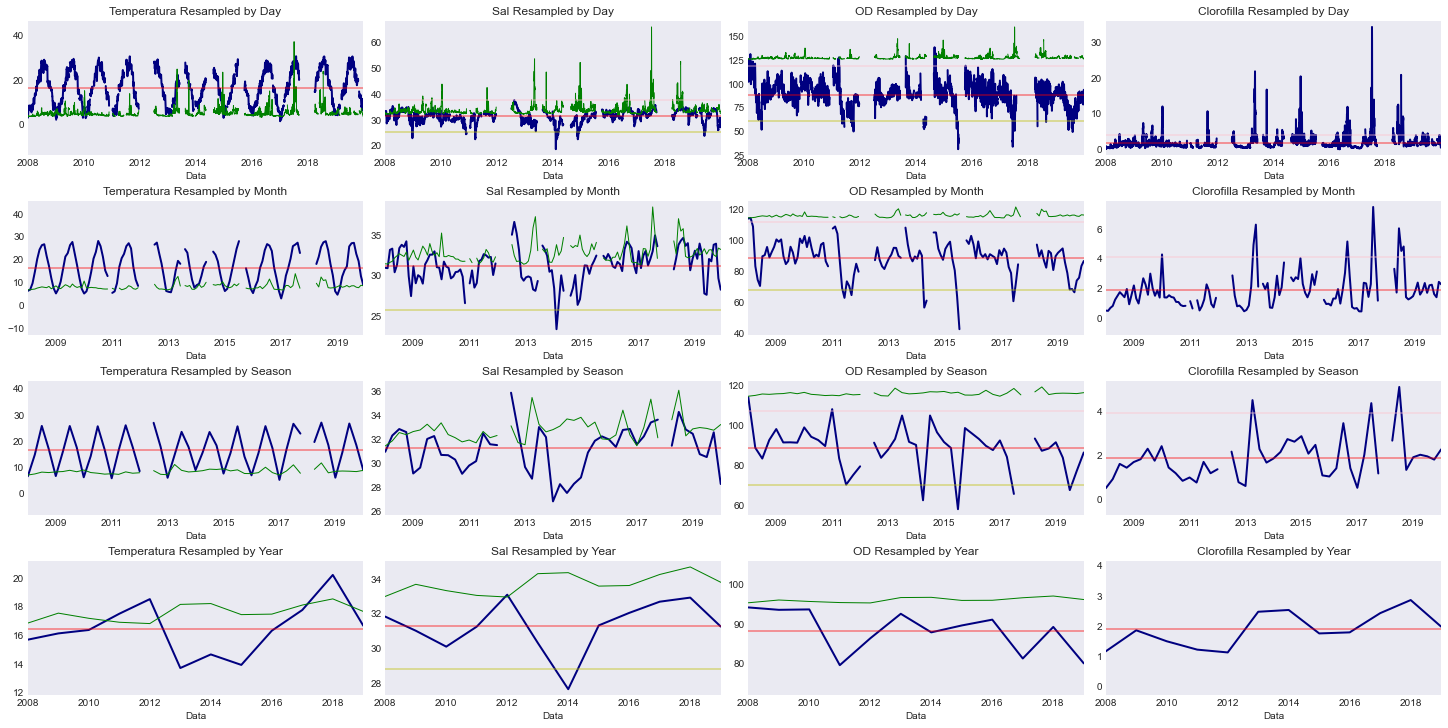

In [38]:
frequency = ["D", "M", "Q-NOV", "Y"] # hour to day, week, month and year.
timeset = ["Day", "Month", "Season","Year"]
fig, axs = plt.subplots(4, 4,constrained_layout=True,figsize=(20,20))
x=0
for i in range(4):
    y=0
    for (cN, cD) in dF.iteritems():
        dFrolling = dF.resample(frequency[i]).mean() #resampled with mean with specific frequency 
        desc=dFrolling.describe()
        IQR = desc[cN][6]-desc[cN][4]
        upper_outlier=desc[cN][6]+1.5*IQR
        lower_outlier=desc[cN][4]-1.5*IQR
        #dFstd = dF.resample(frequency[i]).std()      #resampled with std with specific frequency
        dFrolling[cN].plot(color = "navy", linewidth = 2 , label = ("Resampled "+cN+" by "+ timeset[i]),ax=axs[x,y])
        if cN != "Clorofilla":
            (dFrolling["Clorofilla"]+dFrolling[cN][0]).plot(color = "green", linewidth = 1 ,figsize = (20, 10), label = "Clorofilla",ax=axs[x,y])
        axs[x,y].axhline(y=dFrolling[cN].mean(), color='r', linestyle='-',label="Mean",alpha=0.5)
        if upper_outlier<dFrolling[cN].max():
            axs[x,y].axhline(y=upper_outlier, color='pink', linestyle='-',label=str("Upper Outlier Bound "+str(round(upper_outlier,2))),alpha=0.5)
        else:
            axs[x,y].axhline(y=upper_outlier, color='pink', linestyle='-',label="No Upper Outlier",alpha=0)
        if lower_outlier>dFrolling[cN].min():
            axs[x,y].axhline(y=lower_outlier, color='y', linestyle='-',label=str("Lower Outlier Bound "+str(round(lower_outlier,2))),alpha=0.5)
        else:
            axs[x,y].axhline(y=lower_outlier, color='y', linestyle='-',label="No Lower Outlier",alpha=0)
        #plt.fill_between(dFstd.index, dFrolling[cN] - 2 * dFstd[cN], dFrolling[cN] + 2 * dFstd[cN], color = "g", alpha = 0.2,label="Error interval")
        #plt.legend(loc = "best",prop={'size': 13})
        #plt.xlabel("Date")
        #plt.ylabel(cN + " Levels")
        #plt.title("Line Graph of " + cN + " Resampled by "+timeset[i], fontdict = {'fontsize':20})
        axs[x,y].title.set_text(cN + " Resampled by "+timeset[i])
        #plt.savefig(cN + ' Resampled by'+timeset[i], dpi = 500, bbox_inches = 'tight') #saving figure
        y=y+1
    x=x+1

# Outlier Count
As seen below, temperatura didn't change much in years. But od and clorofilla has much more outliers.

In [41]:
outlier_cnt=pd.DataFrame(index=["Day","Month","Season","Year"],
                         columns=["Temperatura","Sal","OD","Clorofilla"])
frequency = ["D", "M", "Q-NOV", "Y"] # hour to day, week, month and year.
timeset = ["Day", "Month", "Season","Year"]
for (cN, cD) in dF.iteritems():
    for i in range(4):
        cnt=0
        dFrolling = dF.resample(frequency[i]).mean() #resampled with mean with specific frequency 
        desc=dFrolling.describe()
        IQR = desc[cN][6]-desc[cN][4]
        upper_outlier=desc[cN][6]+1.5*IQR
        lower_outlier=desc[cN][4]-1.5*IQR
        for k in dFrolling[cN]:
            if k>upper_outlier:
                cnt+=1
                continue
            if k<lower_outlier:
                cnt+=1
                continue
        outlier_cnt[cN][i]=cnt
outlier_cnt

Temperatura Sal   OD Clorofilla
Day              0  79  144        267
Month            0   1   10          8
Season           0   0    6          3
Year             0   1    0          0

Another way to check for outliers is looking Upper-Lower bounds. 
Explanation: Navy lines are the real values directly from the dataset. Orange lines are resampled lines by respect of frequency. And green areas are the interval for outliers. If any "orange line" value goes above this line than it is an outlier. 

Open the image on a new tab to see it clearly.

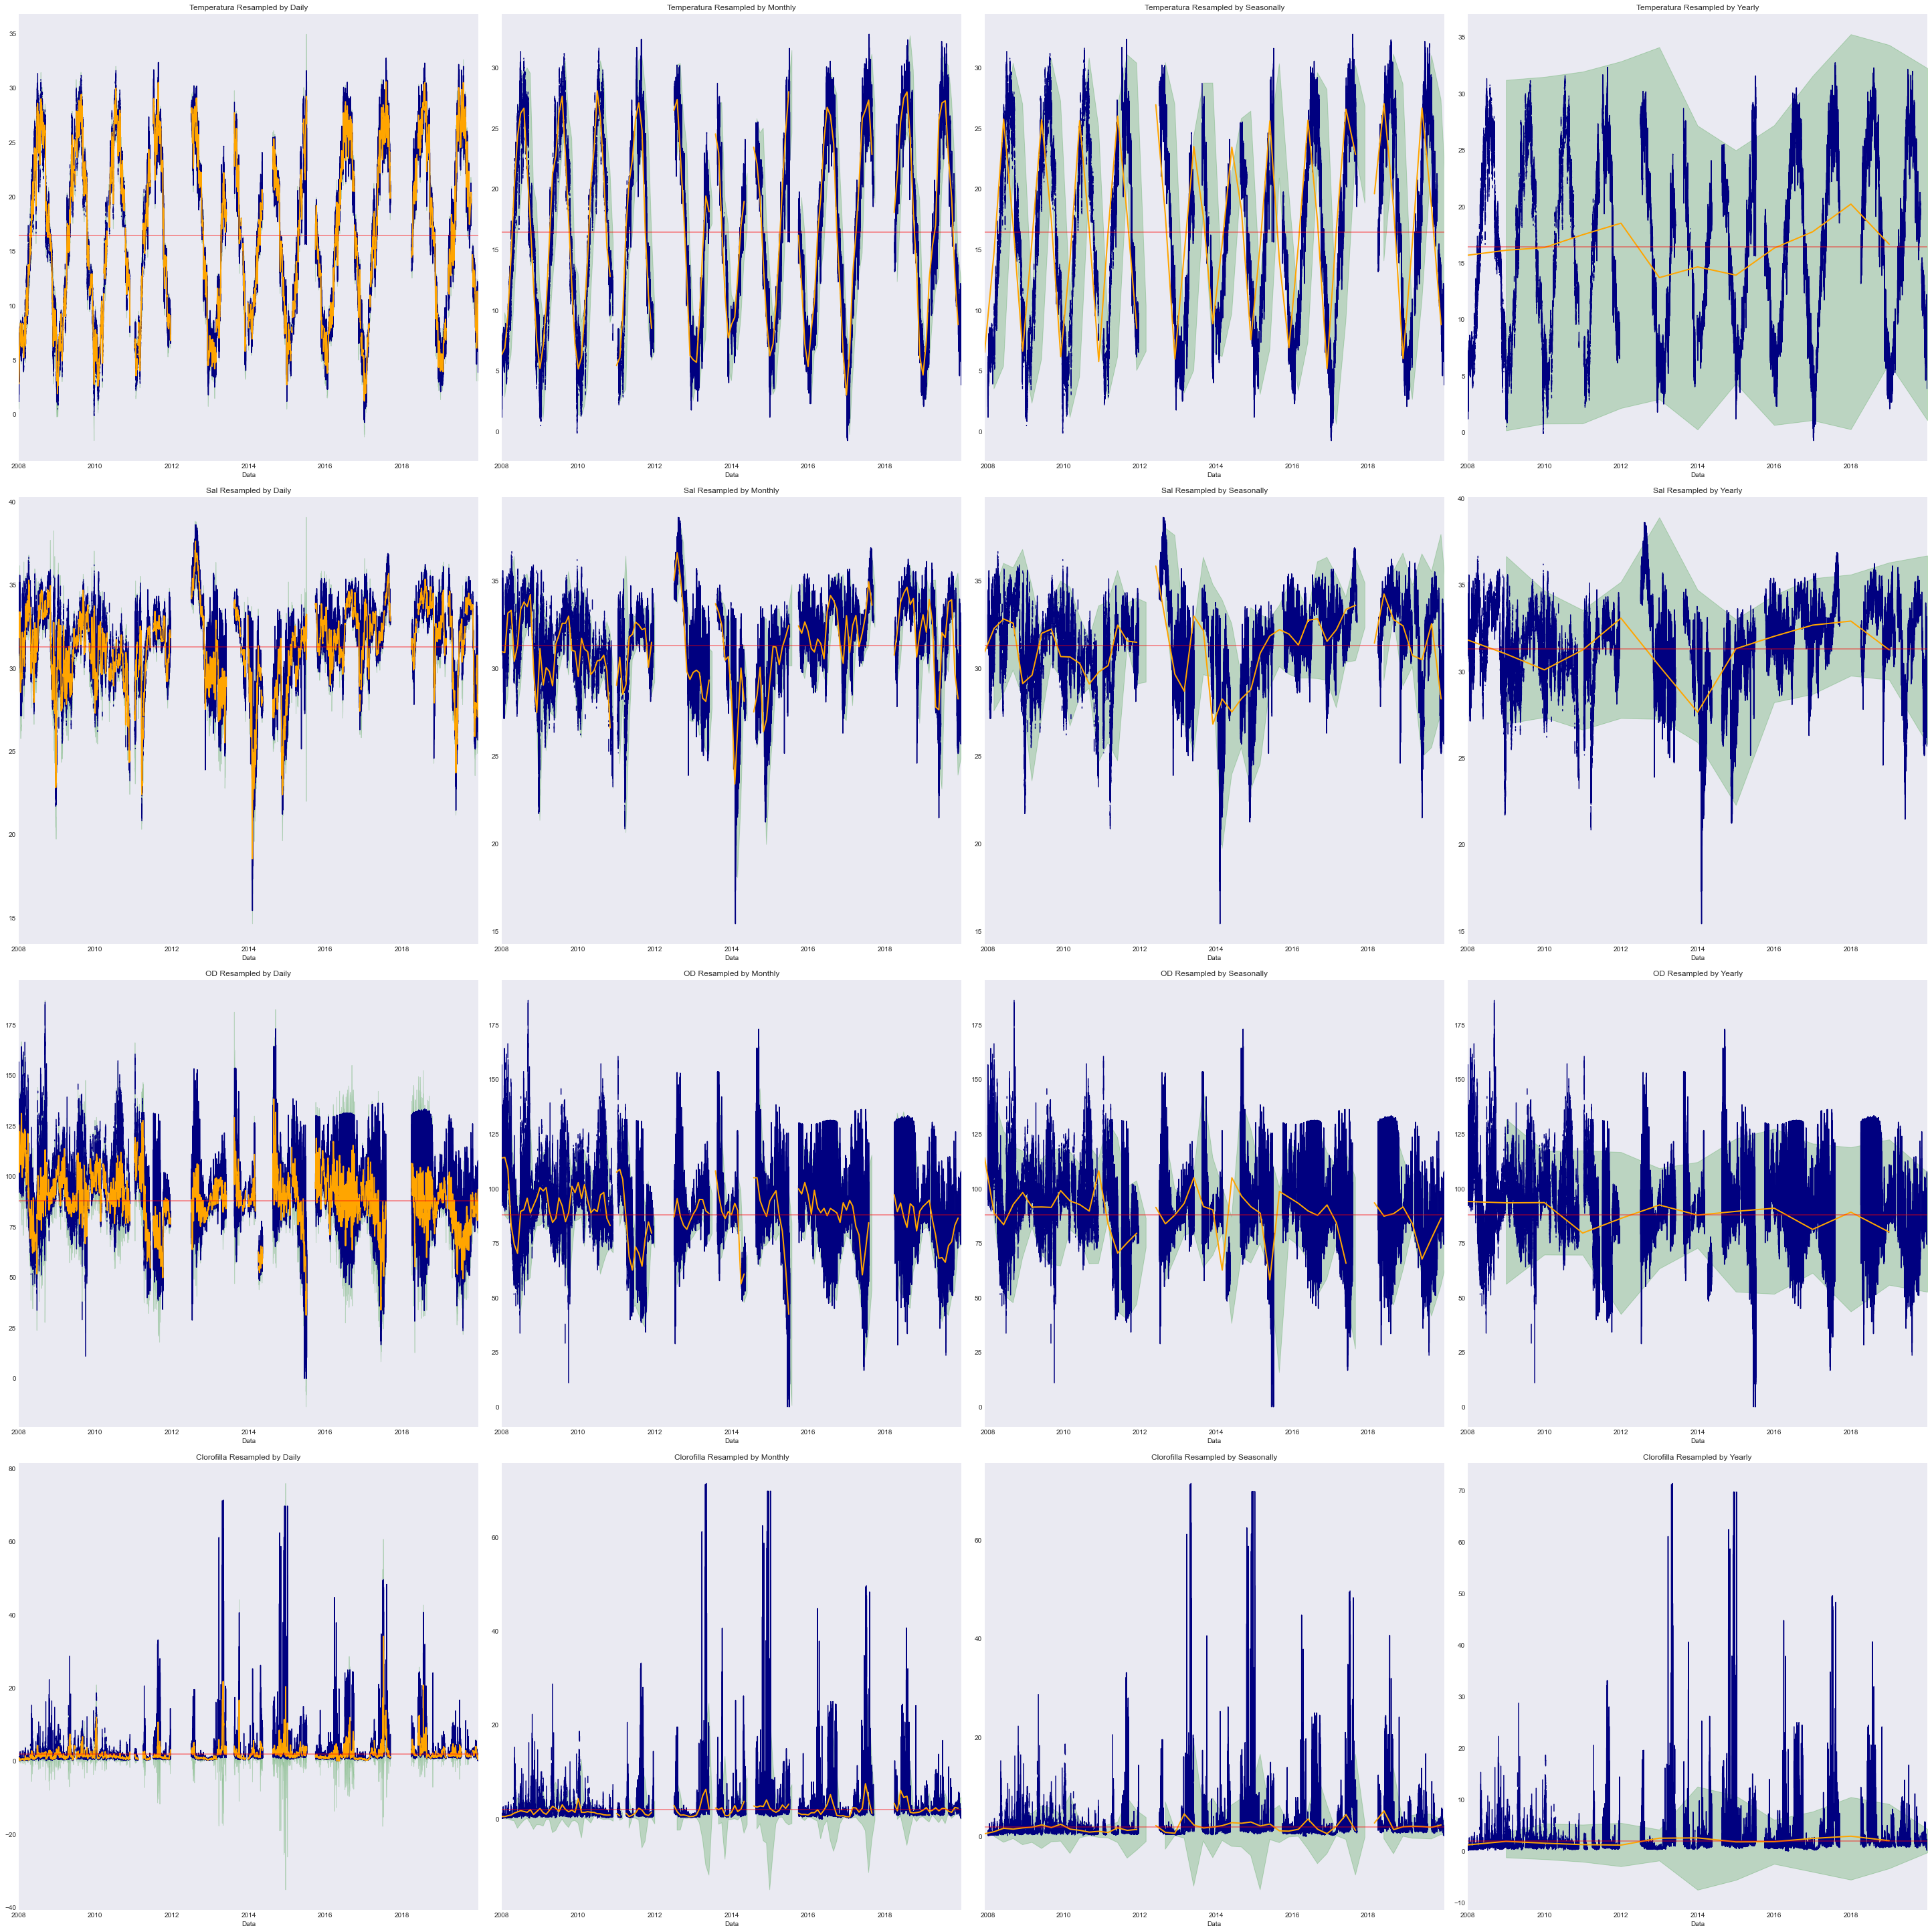

In [44]:
frequency = ["D", "M", "Q-NOV", "Y"] # hour to day, week, month and year.
timeset = ["Daily", "Monthly", "Seasonally","Yearly"]
fig, axs = plt.subplots(4, 4,constrained_layout=True,figsize=(40,40))
x=0
for (cN, cD) in dF.iteritems():     #do plots for each column
    y=0
    for i in range(4):  # do it for 4 different frequency
        dF.asfreq("H")[cN].plot(color = "navy", label = "Real Value",ax=axs[x,y])
        dFrolling = dF.resample(frequency[i]).mean() #resampled with mean with specific frequency 
        dFstd = dF.resample(frequency[i]).std()      #resampled with std with specific frequency
        dFrolling[cN].plot(color = "orange", linewidth = 2 , label = ("Rolling Mean "+ timeset[i]),ax=axs[x,y])
        axs[x,y].axhline(y=dF[cN].mean(), color='r', linestyle='-',label="Mean",alpha=0.5)
        axs[x,y].fill_between(dFstd.index, dFrolling[cN] - 2 * dFstd[cN], dFrolling[cN] + 2 * dFstd[cN], color = "g", alpha = 0.2,label="Error interval")
        #plt.legend(loc = "best",prop={'size': 8})
        #plt.xlabel("Date")
        #plt.ylabel(cN + " Levels")
        #plt.title("Graph of " + cN + " with "+timeset[i]+" Rolling Mean and Std with Upper-Lower Bounds", fontdict = {'fontsize':12})
        axs[x,y].title.set_text(cN + " Resampled by "+timeset[i])
        #plt.savefig(cN + ' Mean and Std '+timeset[i], dpi = 500, bbox_inches = 'tight') #saving figure
        y=y+1
    x=x+1

# Jointplot
That is an alternative correlation plot in seaborn library.

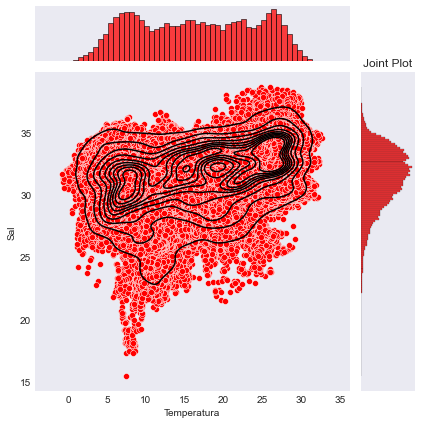

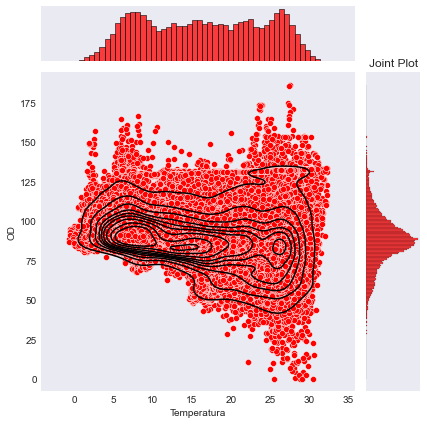

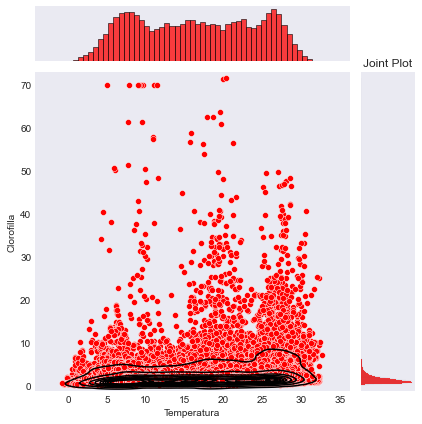

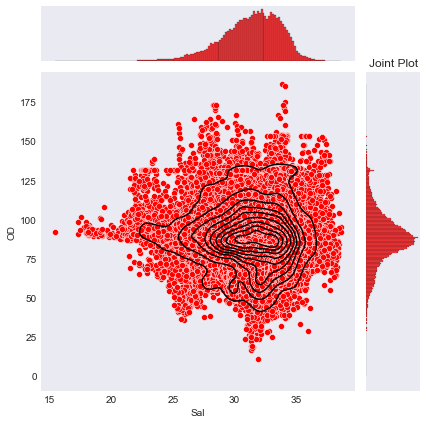

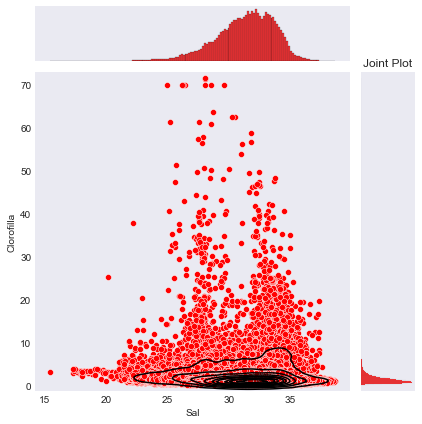

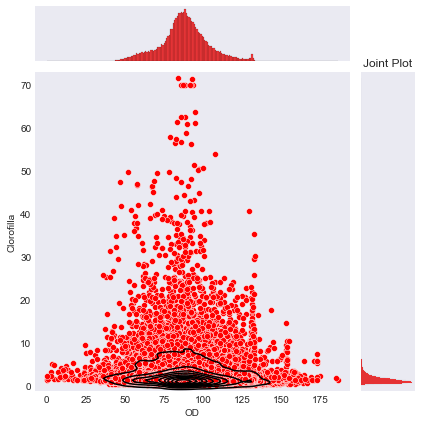

In [45]:
for i in range(4):
    for k in range(4):
        if(i < k):
            g = sbn.jointplot(x = dF.iloc[: , i], y = dF.iloc[: , k], color = "red")
            g.plot_joint(sbn.kdeplot, color = "black")
            plt.title("Joint Plot")
            #plt.savefig(dF.columns[i] + " - " + dF.columns[k] + " Joint Plot KDE Scatter", dpi = 500, bbox_inches = 'tight')

# Heatmap Diagram
This is a matrix show correlation between features.

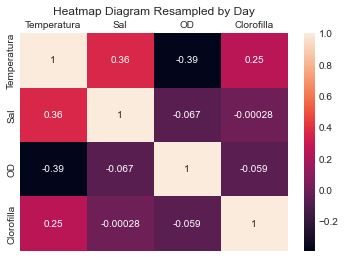

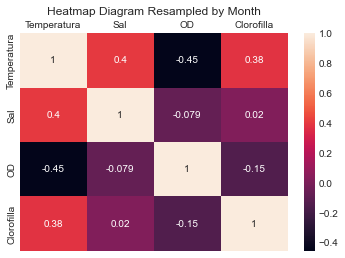

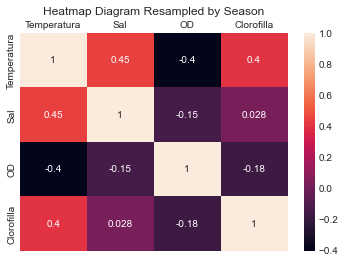

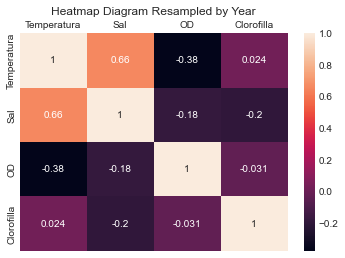

In [48]:
frequency = ["D", "M", "Q-NOV", "Y"] # hour to day, week, month and year.
timeset = ["Day", "Month", "Season","Year"]
for i in range(4):
    corrmat = dF.resample(frequency[i]).mean().corr()
    sbn.heatmap(corrmat, vmax = 1. , square = False, annot = True).xaxis.tick_top()
    plt.title("Heatmap Diagram Resampled by "+timeset[i])
    plt.savefig("Heatmap Diagram Resampled by "+timeset[i], dpi = 500, bbox_inches = 'tight')
    plt.show()

# Hinton Graph
This is a graph just like heatmap.

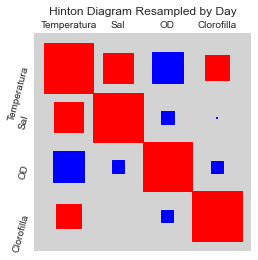

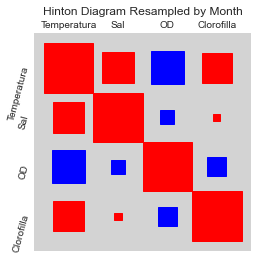

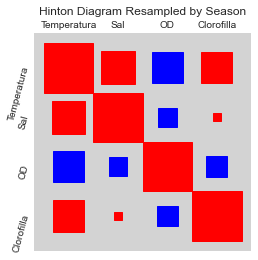

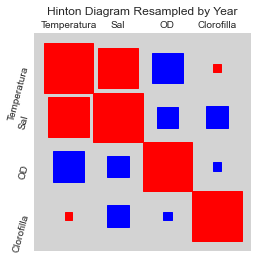

In [50]:
def hinton(matrix,resample="", max_weight = None, ax = None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'red' if w > 0 else 'blue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                              facecolor = color, edgecolor = color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation = 30)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)

    ax.autoscale_view()
    ax.invert_yaxis()
    plt.xticks(rotation = 0)
    plt.yticks(rotation = 75)
    if resample=="":
        plt.title("Hinton Diagram")
        #plt.savefig("Hinton Diagram", dpi = 500, bbox_inches = 'tight')
    else:
        plt.title("Hinton Diagram Resampled by "+resample)
        #plt.savefig("Hinton Diagram Resampled by "+resample, dpi = 500, bbox_inches = 'tight')
frequency = ["D", "M", "Q-NOV", "Y"] # hour to day, week, month and year.
timeset = ["Day", "Month", "Season","Year"]
for i in range(4):
    corrmat = dF.resample(frequency[i]).mean().corr()
    hinton(corrmat,resample=timeset[i])
    plt.show()

# Scree plot and Scaled plot
Line plot of scaled data shows how data moves respected to each other in the same scale.
Scree plot shows variance of each feature.

In [56]:
# Scale function scales data with 0 mean and variation of 1 for each variable.
standardised = scale(dF)
standardised = pd.DataFrame(standardised, index=dF.index, columns=dF.columns)
#standardised.apply(np.mean)
pca = PCA().fit(standardised)
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    return summary
summary = pca_summary(pca, standardised)

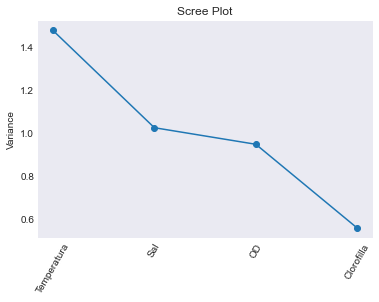

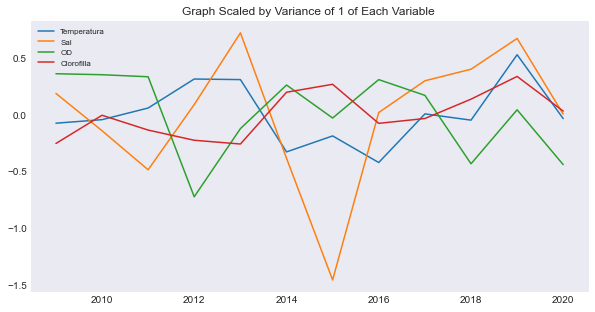

In [57]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, [str(cN) for (cN,cD) in standardised_values.iteritems()], rotation=60)
    plt.ylabel("Variance")
    plt.title("Scree Plot")
    plt.savefig("Scree Graph", dpi=500,bbox_inches='tight')
    plt.show()
screeplot(pca, standardised)
standardised.reset_index(inplace=True)
stresampled=standardised.resample('Y', on='Data').mean()
plt.figure(figsize=(10,5))
plt.plot(stresampled,label=["Temperatura","Sal","OD","Clorofilla"])
plt.legend(fontsize=8,loc="best")
plt.title("Graph Scaled by Variance of 1 of Each Variable ")
plt.savefig("Scaled Graph", dpi=500,bbox_inches='tight')
plt.show()

# Consecutive Nan Values
The dataset is not perfect and it contains months of missing values. So adding areas to show consecutive nans is a useful idea.

In [63]:
dF=pd.read_excel("Samanet_Ve8_[2008-2019]-hourly-with-missing-values.xlsx",index_col=0)
hourly_frequency=dF.asfreq("H")
consecutive_nan=pd.DataFrame(columns=["isnull"],index=hourly_frequency.index)
for i in range(len(hourly_frequency)):
    a=0
    for (cN, cD) in hourly_frequency.iteritems():
        if pd.isnull(hourly_frequency[cN][i]):
            consecutive_nan["isnull"][i]=1
            a=1
            break
    if a==0:
        consecutive_nan["isnull"][i]=0
cons=0
start_dates=[]
end_dates=[]
for i in range(len(consecutive_nan)):
    if consecutive_nan["isnull"][i]==1:
        if cons==0:
            index_start=consecutive_nan.index[i]
        cons+=1
    else:
        if cons>=720:
            index_end=consecutive_nan.index[i]
            start_dates.append(index_start)
            end_dates.append(index_end)
        cons=0
start_end_dates=pd.DataFrame()
start_end_dates["Start"]=start_dates
start_end_dates["End"]=end_dates

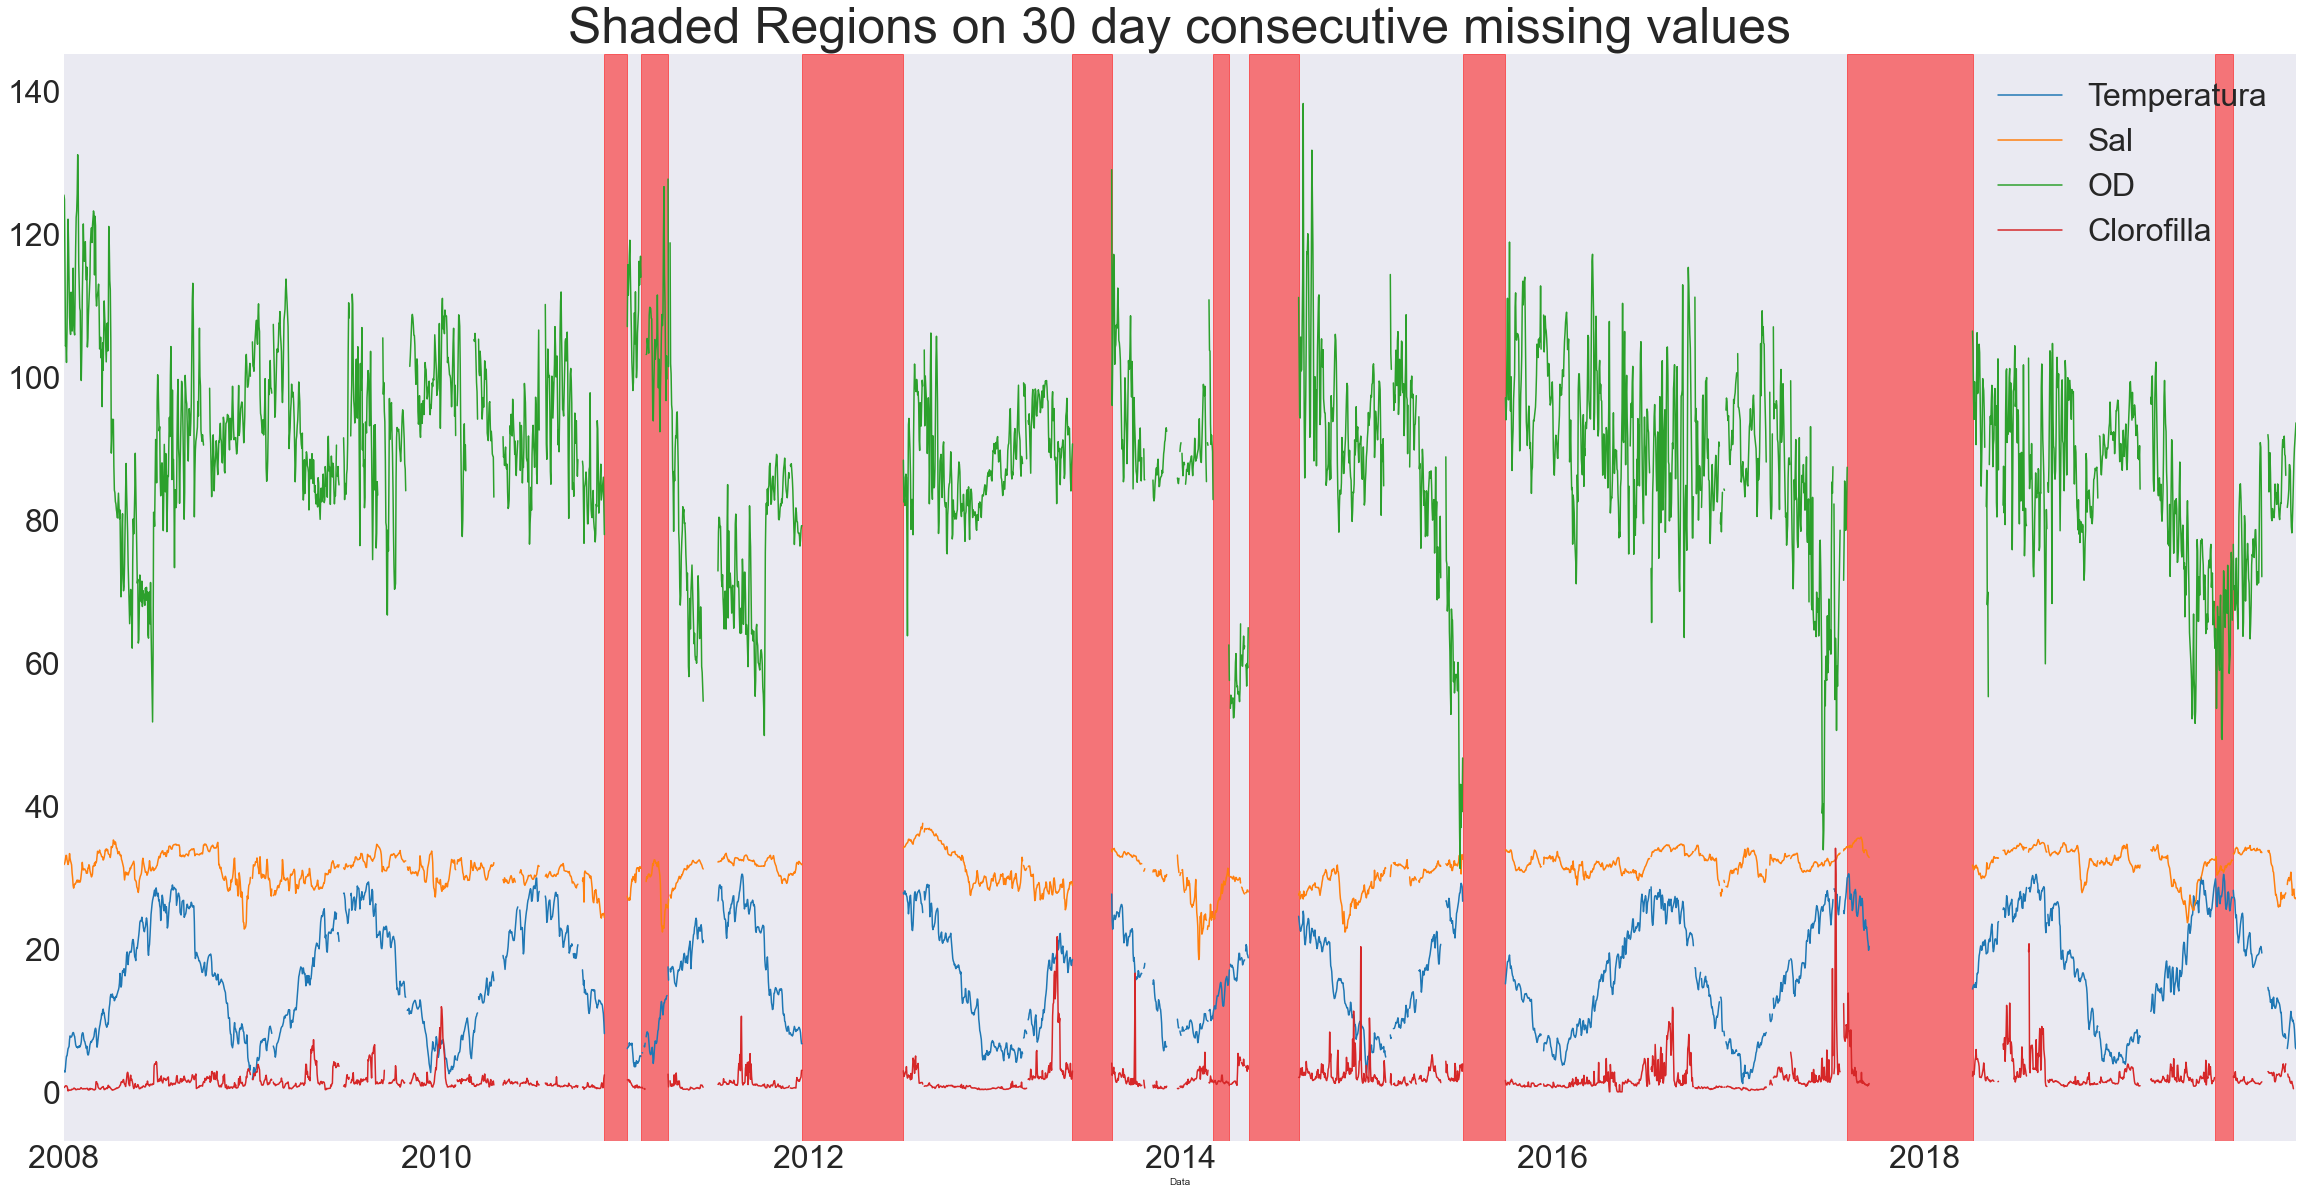

In [69]:
dF.resample("D").mean().plot(figsize=(40,20))
for i in range(len(start_end_dates)):
    plt.axvspan(start_end_dates["Start"][i], start_end_dates["End"][i], alpha=0.5, color='red')
plt.legend(prop={'size': 32})
plt.title("Shaded Regions on 30 day consecutive missing values",fontdict = {'fontsize':50})
plt.rc('xtick', labelsize=32)
plt.rc('ytick', labelsize=32)
plt.savefig("Daily Resampled 30 days consetive line")
plt.show()    